<a href="https://colab.research.google.com/github/MohammedAyaan/Mini-Project/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [ ]:
# Installing autotime which shows the compilation time.

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.86 s (started: 2021-05-16 05:04:34 +00:00)


In [ ]:
# Importing necessary libraries.

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

time: 8.31 ms (started: 2021-05-16 05:04:48 +00:00)


In [ ]:
# Creating empty lists

target = []
images = []
flat_data = []

# importing images from drive which were downloaded using Imageye Plug-in from Chrome

# Link to images - https://drive.google.com/drive/folders/1057SifQZg8B2JP3CuKoOm-Q4f6lrnkU1?usp=sharing

DATADIR = '/content/drive/MyDrive/Image Classification/Colors'
CATEGORIES = ['Black','Blue','Green','Red','White']

time: 3.31 ms (started: 2021-05-16 05:04:51 +00:00)


In [ ]:
# Preprocessing data and appending them into lists created before.

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) #label encoding the values
    path = os.path.join(DATADIR,category) #Create path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #resizing
        img_resized = resize(img_array,(150,150,3)) #Normalizes the value from 0 to 1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 7min 24s (started: 2021-05-16 05:04:54 +00:00)


In [ ]:
# Importing libraries for modeling.

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#creating training and testing data sets
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 43.4 ms (started: 2021-05-16 05:12:29 +00:00)


In [ ]:
#Creating sklearn pipeline to scale data uing StandardScalar()
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)

#Checking the score
pipe.score(x_test, y_test)

1.0

time: 1.67 s (started: 2021-05-16 05:12:32 +00:00)


In [ ]:
#Printing all the classes used in the model.
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        13

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

time: 397 ms (started: 2021-05-16 05:12:38 +00:00)


In [ ]:
#Using GridSearchCV to compare between SVM, Random forest and Logistic Regression

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

time: 2.51 ms (started: 2021-05-16 05:12:42 +00:00)


In [ ]:
#Defining different models (SVM, Random forest, Logistic Regression)

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

time: 6.83 ms (started: 2021-05-16 05:12:45 +00:00)


In [ ]:
#Code to run GridSearchCV

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    #pipline to scale the data
    pipe = make_pipeline(StandardScaler(), mp['model'])
    #training the model using GridSearchCV
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    #Appending Scores to check score
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.986882,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.934194,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.928172,{'logisticregression__C': 1}


time: 13min 27s (started: 2021-05-16 05:12:48 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 0, 0, 1, 3, 1, 4, 2, 3, 4, 3, 3, 4, 4, 2, 2, 2, 0, 2, 4, 1,
       3, 4, 3, 4, 1, 4, 0, 3, 3, 0, 2, 1, 3, 3, 0, 2, 4, 2, 1, 1, 3, 0,
       3, 2, 2, 0, 4, 4, 1, 0, 1, 0, 2, 4, 0, 4, 1, 0, 2, 4, 3, 4, 3, 1])

time: 53.5 ms (started: 2021-05-16 05:26:53 +00:00)


In [ ]:
#Accuracy score and confusion matrix of SVM

from sklearn.metrics import accuracy_score,confusion_matrix
best_clf = best_estimators['svm']
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  0, 14,  0],
       [ 0,  0,  0,  0, 13]])

time: 246 ms (started: 2021-05-16 05:26:56 +00:00)


Text(69.0, 0.5, 'Truth')

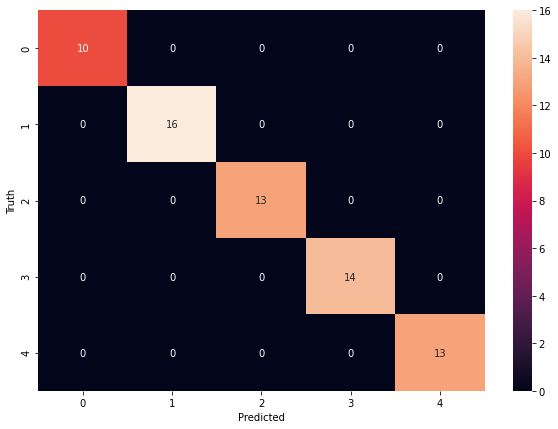

time: 362 ms (started: 2021-05-16 05:26:59 +00:00)


In [ ]:
#Confusion matrix of SVM using seaborn for better visualization

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Saving the model

import pickle
pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

time: 16.9 ms (started: 2021-05-16 05:27:03 +00:00)


Enter your URLhttps://i.stack.imgur.com/5UN4K.png
(756, 1008, 4)
 PREDICTED OUTPUT: White


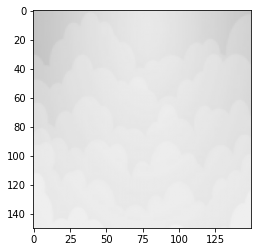

time: 28.2 s (started: 2021-05-16 05:27:11 +00:00)


In [ ]:
# Code to check predictions.

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')